# 3.13. Modelo de corderos seleccionado

Después de realizar una comparación, el modelo que mejor funciono fue el 3, entrenado con los datos de departamentos de Chubut actualizados con los datos de las encuestas; que si bien en un principio parecía tener overfit debido a las altas métricas fue capaz de generelizar bastante bien para datos que no conocía y fue el que obtuvo mayor puntaje. Por lo tanto es el que va ser utilizado en la aplicación.

En la siguiente celda de código, se importarán varias librerías, entre ellas:

- Pandas para manejar los datos a través de DataFrames.
- Matplotlib y Seaborn se utilizarán para visualizar los resultados de las predicciones mediante gráficos.
- De Scikit-learn se utilizarán la  métricas **r2_score**.
- Por último, se usará load_pickle para recuperar el modelo entrenado guardado previamente.

In [42]:
import pandas as pd
import seaborn as snsº
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from statsmodels.iolib.smpickle import load_pickle

Cargamos el modelo para mostrar como se vería en la aplicación.

In [43]:
modelo_corderos = load_pickle('modelos/modelo_prediccion_corderos_3')

Se creo un modelo con datos aleatorios del dataset 1 y 2, para ver con un conjunto de datos cuál sería el resultado.

In [44]:
data = pd.read_csv("datos/datos_reducidos_corderos.csv")
data

,fecha,provincia,departamento,carneros,ovejas,borregos,capones,cordero/as,total_ovinos,kilos_lana,finura,rinde,humedad,cant_lluvia,tem_max,temp_media,temp_min
0,2012-12-31,CHUBUT,BIEDMA,2740,52320,22319,25489,29517,132385,478116.00,19.30,55.68,58.40,46.40,18.10,12.40,6.70
1,2013-12-31,CHUBUT,BIEDMA,3925,70677,27227,33389,36961,172179,544941.00,19.80,55.00,64.70,226.50,19.90,14.20,8.80
2,2019-12-31,CHUBUT,BIEDMA,3606,70938,32085,33311,38587,178527,615918.15,19.57,55.61,54.10,295.50,18.70,13.60,8.70
3,2020-12-31,CHUBUT,BIEDMA,3084,82806,29134,33727,25394,174145,630450.00,19.10,58.71,58.30,191.40,20.50,14.60,9.20
4,2008-12-31,CHUBUT,CUSHAMEN,4578,86402,28200,19288,44487,182955,532399.05,19.83,62.10,52.35,304.50,19.85,12.20,4.10
5,2013-12-31,CHUBUT,CUSHAMEN,4751,85946,26255,17619,41451,176022,479996.00,20.04,57.47,58.22,769.59,18.90,11.88,5.49
6,2014-12-31,CHUBUT,CUSHAMEN,4198,77263,26512,18975,46290,173238,578184.00,19.74,63.35,59.10,640.40,17.03,10.46,4.62
7,2015-12-31,CHUBUT,CUSHAMEN,5377,99927,33404,23023,52959,214690,663392.10,19.78,63.34,48.54,756.57,18.92,11.99,5.68
8,2020-12-31,CHUBUT,CUSHAMEN,5385,124862,33570,28086,52545,244448,708750.00,19.50,64.01,46.48,131.40,25.22,15.62,5.92
9,2009-12-31,CHUBUT,FLORENTINO AMEGHINO,7970,131131,56083,47690,83896,326770,1188846.00,19.40,58.79,48.40,137.70,20.40,12.90,5.70


In [45]:
X = data[['cant_lluvia', 'ovejas']]
y = data[['cordero/as']]

In [46]:
resultado_prediccion = modelo_corderos.predict(X)

In [47]:
'Score o R2 de la predicción: {:.2%}'.format(r2_score(y, resultado_prediccion))

'Score o R2 de la predicción: 75.60%'

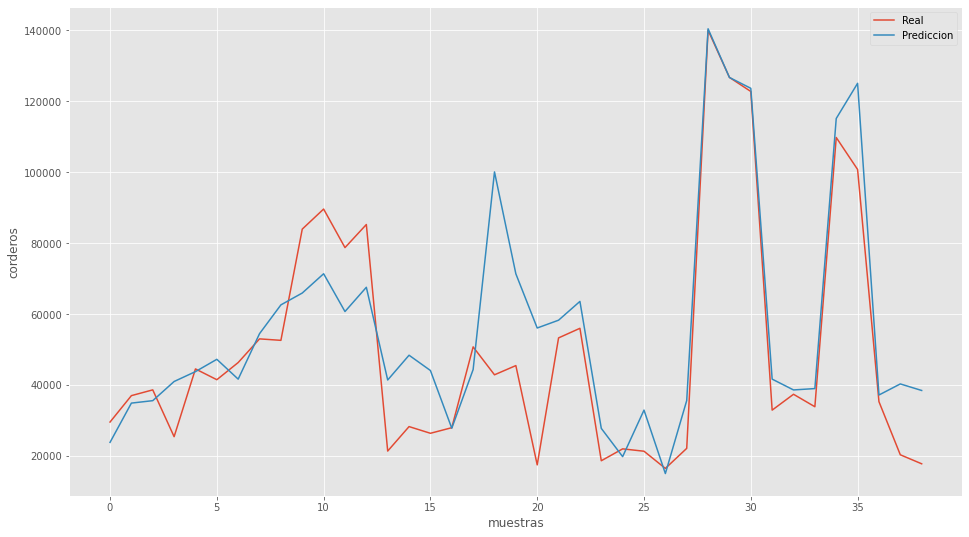

In [48]:
plt.plot(range(len(y)),y,label="Real")
plt.plot(range(len(resultado_prediccion)),resultado_prediccion,label="Prediccion")
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.xlabel('muestras')
plt.ylabel('corderos')
plt.legend()
plt.show()

Vemos que el modelo predice bien con un 92% de exactitud.